In [1]:
import pandas as pd
import math as math
from numpy import *
import pylab as PP
import scipy as sci
import scipy.stats as stats
import numpy as np
#import the data as a pandas data frame
dataframe = pd.read_csv('Production_Crops_E_All_Data.csv', encoding = 'ISO-8859-1')



In [2]:
column_headers = list(dataframe) #creates a list of column names
#creates a list of all columns ending in 'F' (columns indicating data collection technique) using the column names list
to_drop = [col for col in column_headers if col[-1] == 'F' or col[-1] == 'e'] 
#drops these lists from the data frame
df2 = dataframe.drop(to_drop, axis = 1)
#
df2.columns=df2.columns.str.replace('Y', '')
df2['Item'] = df2['Item'].str.replace('nes', '') #remove 'nes' from the end of some crop titles
df2 = df2[df2.Element == "Area harvested"]
df2 = df2.drop("Unit", axis=1) #dropping the unit and element columns
df2 = df2.drop("Element", axis=1)

In [3]:
regions_to_remove = ['Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Asia',
       'Central Asia', 'Eastern Asia', 'Southern Asia',
       'South-Eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania',
       'Australia & New Zealand', 'Melanesia', 'Micronesia', 'Polynesia',
       'European Union', 'Least Developed Countries',
       'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Western Sahara', 'World']
df2 = df2[~df2['Area'].isin(regions_to_remove)]

In [4]:
df2=df2[df2.Item.str.contains("Total") |
          df2.Item.str.contains("Fruit") |
          df2.Item.str.contains("Cereal") |
          df2.Item.str.contains("Fibre crops") |
          df2.Item.str.contains("Vegetables") |
          df2.Item.str.contains("Pulses") |
          df2.Item.str.contains("Nuts") |
          df2.Item.str.contains("Roots and tubers") |
          df2.Item.str.contains("Oilcakes") | 
          df2.Item.str.contains("Primary") |
          df2.Item.str.contains("Beans, dry") |
          df2.Item.str.contains("Oilseeds") |
          df2.Item.str.contains("Grain") |
          df2.Item.str.contains("Oilcrops") |
          df2.Item.str.contains("Grain")== False]
df2
#this last bit is unneccessary, but it switches the dataframe so it is easier to read
#final=df2.pivot(index = 'Item', columns = 'Area').transpose().swaplevel(0,1, axis =0)
#final

Area                                    Item       1961  \
0      Afghanistan                     Almonds, with shell        NaN   
3      Afghanistan        Anise, badian, fennel, coriander        NaN   
6      Afghanistan                                  Apples     2220.0   
9      Afghanistan                                Apricots     4820.0   
12     Afghanistan                                  Barley   350000.0   
16     Afghanistan                                Berries      6800.0   
22     Afghanistan                                    Figs     3200.0   
34     Afghanistan                                  Grapes    50000.0   
37     Afghanistan                                 Linseed    46800.0   
41     Afghanistan                                   Maize   500000.0   
45     Afghanistan         Melons, other (inc.cantaloupes)     3300.0   
48     Afghanistan                                  Millet    23500.0   
55     Afghanistan                                  Olives      600.0   
58     Afghanistan                                 Oranges     1430.0   
61     Afghanistan                     Peaches and nectari     1810.0   
64     Afghanistan                                   Pears      300.0   
67     Afghanistan                              Pistachios        NaN   
70     Afghanistan                         Plums and sloes     4320.0   
73     Afghanistan                                Potatoes    15000.0   
81     Afghanistan                             Rice, paddy   210000.0   
85     Afghanistan                             Seed cotton    76892.0   
88     Afghanistan                             Sesame seed    33200.0   
92     Afghanistan                              Sugar beet     3537.0   
95     Afghanistan                              Sugar cane     1800.0   
98     Afghanistan                          Sunflower seed     8300.0   
105    Afghanistan                     Walnuts, with shell        NaN   
108    Afghanistan                             Watermelons    13000.0   
111    Afghanistan                                   Wheat  2230000.0   
161        Albania                                  Apples        NaN   
164        Albania                                Apricots        NaN   
...            ...                                     ...        ...   
42050     Zimbabwe            Mangoes, mangosteens, guavas        NaN   
42053     Zimbabwe         Melons, other (inc.cantaloupes)        NaN   
42056     Zimbabwe                                  Millet   400000.0   
42064     Zimbabwe                                    Oats        NaN   
42070     Zimbabwe                             Onions, dry      146.0   
42073     Zimbabwe                                 Oranges     6000.0   
42076     Zimbabwe                                 Papayas        NaN   
42079     Zimbabwe                     Peaches and nectari        NaN   
42082     Zimbabwe                                   Pears        NaN   
42086     Zimbabwe                     Pepper (piper spp.)        NaN   
42089     Zimbabwe                              Pineapples        NaN   
42092     Zimbabwe                         Plums and sloes        NaN   
42095     Zimbabwe                                Potatoes     2023.0   
42103     Zimbabwe                             Raspberries        NaN   
42106     Zimbabwe                             Rice, paddy     1000.0   
42113     Zimbabwe                             Seed cotton     1230.0   
42116     Zimbabwe                                 Sorghum   125000.0   
42120     Zimbabwe                                Soybeans      741.0   
42124     Zimbabwe                                Spices,       400.0   
42127     Zimbabwe                            Strawberries        NaN   
42130     Zimbabwe                              Sugar cane     3800.0   
42133     Zimbabwe                          Sunflower seed     1849.0   
42137     Zimbabwe                          Sweet potatoes      166.0   

In [5]:
def shannon_div(x):
    x = x[x > 0]
    p = x / sum(x)
    return(exp(-(sum(p * log(p)))))
country_div = pd.DataFrame(df2.iloc[:,2:].groupby(df2['Area']).apply(shannon_div)) #.replace(1.0, NaN)
# 1 values were returned when there were NaN values across all crops for one year, so these are returned back to NaN
country_div

1961       1962       1963  \
Area                                                                         
Afghanistan                                 3.900495   3.837214   3.910569   
Albania                                     6.802608   7.239194   7.376827   
Algeria                                     4.642173   4.505430   4.457132   
American Samoa                              2.198852   2.209804   2.253926   
Angola                                      6.914655   6.589850   6.711764   
Antigua and Barbuda                         1.436756   1.395286   1.440727   
Argentina                                   9.902409   9.921601   9.117237   
Armenia                                     1.000000   1.000000   1.000000   
Australia                                   3.481086   3.329770   3.399485   
Austria                                     7.215474   7.338225   7.451608   
Azerbaijan                                  1.000000   1.000000   1.000000   
Bahamas                                     5.383216   5.489459   5.584051   
Bahrain                                     1.538994   1.538994   1.600934   
Bangladesh                                  3.445424   3.293134   3.235204   
Barbados                                    1.855025   1.835891   1.884767   
Belarus                                     1.000000   1.000000   1.000000   
Belgium                                     1.000000   1.000000   1.000000   
Belgium-Luxembourg                          8.167805   8.329465   8.582695   
Belize                                      3.869293   4.040283   4.505763   
Benin                                       6.893507   6.478194   6.732053   
Bermuda                                     4.776625   4.527545   5.356439   
Bhutan                                      6.204489   6.225036   6.242350   
Bolivia (Plurinational State of)           10.608345  10.733962  10.756120   
Bosnia and Herzegovina                      1.000000   1.000000   1.000000   
Botswana                                    1.245029   2.088602   2.201889   
Brazil                                     10.352612  10.258694  10.201228   
British Virgin Islands                      1.000000   1.000000   1.000000   
Brunei Darussalam                           1.872084   2.005192   2.470870   
Bulgaria                                    9.565314   9.697224   9.834531   
Burkina Faso                                5.301042   5.097321   4.964744   
...                                              ...        ...        ...   
Tajikistan                                  1.000000   1.000000   1.000000   
Thailand                                    3.758359   3.615682   3.878854   
The former Yugoslav Republic of Macedonia   1.000000   1.000000   1.000000   
Timor-Leste                                 5.280777   5.033534   5.239264   
Togo                                        7.727641   7.898348   7.515451   
Tokelau                                     1.057118   1.044873   1.091445   
Tonga                                       6.716219   7.009554   6.837829   
Trinidad and Tobago                         6.588644   6.736358   6.742495   
Tunisia                                     5.438297   5.320945   4.636004   
Turkey                                      8.759505   8.722701   8.745006   
Turkmenistan                                1.000000   1.000000   1.000000   
Tuvalu                                      1.000000   1.000000   1.000000   
USSR                                        8.849287   8.891566   9.192401   
Uganda                                     10.662440  10.700080  10.476038   
Ukraine                                     1.000000   1.000000   1.000000   
United Arab Emirates                        2.607513   2.537498   2.537499   
United Kingdom                              5.338365   5.238967   4.963655   
United Republic of Tanzania                13.201686  13.406441  13.435184   
United States Virgin Islands                1.000000   1.000000   1.00

In [6]:
#creating a function to plot indexes based on country name
countries = df2['Area'].unique()
def reg(x, dataframe): #x is required to be desired country names as a list of strings
    for item in x:
        try:
            country = dataframe.loc[item].dropna() #takes the row of data based on country dropping NaN values
            years = country.axes[0] #pulls the years linked with non NaN values
            years = years.astype(int)
            slope,intercept,_,_,_ = stats.linregress(years, country) #regression 
            PP.scatter(years, country)
            PP.plot(years, slope*years + intercept, 'g') #g makes a green line
            PP.title(str(item) + " Diversity Index")
            PP.xlabel("Years")
            PP.ylabel("Shannon Diversity Index")
            PP.show()
        except: 
            print("Error in producing graph for:", item)

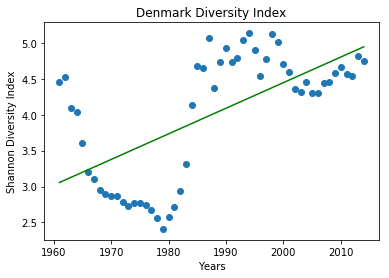

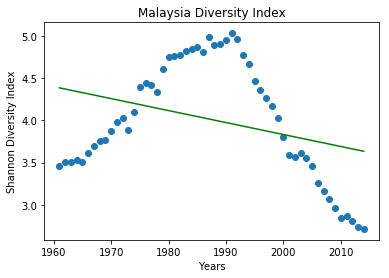

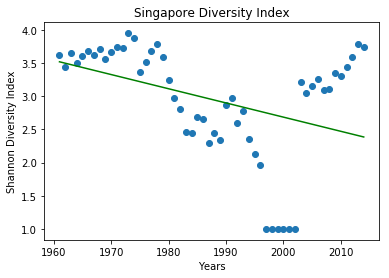

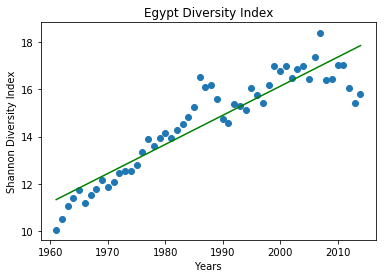

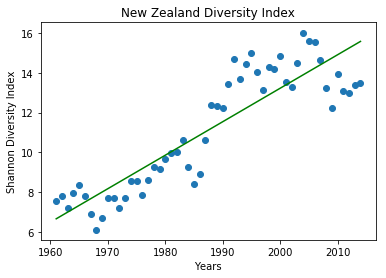

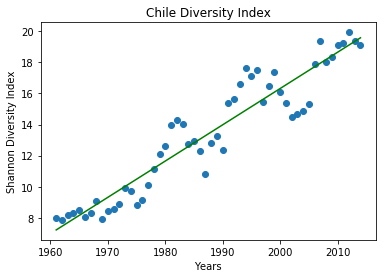

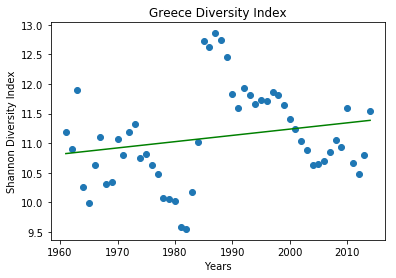

In [46]:
group2 = ["Bangladesh", "Denmark", "Malaysia", "United Kingdom"]
group4 = ["Argentina", "Hungary", "France", "Cuba"]
group3 = ["Singapore", "Mongolia", "Iceland", "Somalia"]
group1 = ["Egypt", "New Zealand", "Chile", "Greece"]
reg(group2, country_div)
reg(group4, country_div)
reg(group3, country_div)
reg(group1, country_div)

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
country_div = country_div.dropna()
Z = linkage(country_div, 'ward')

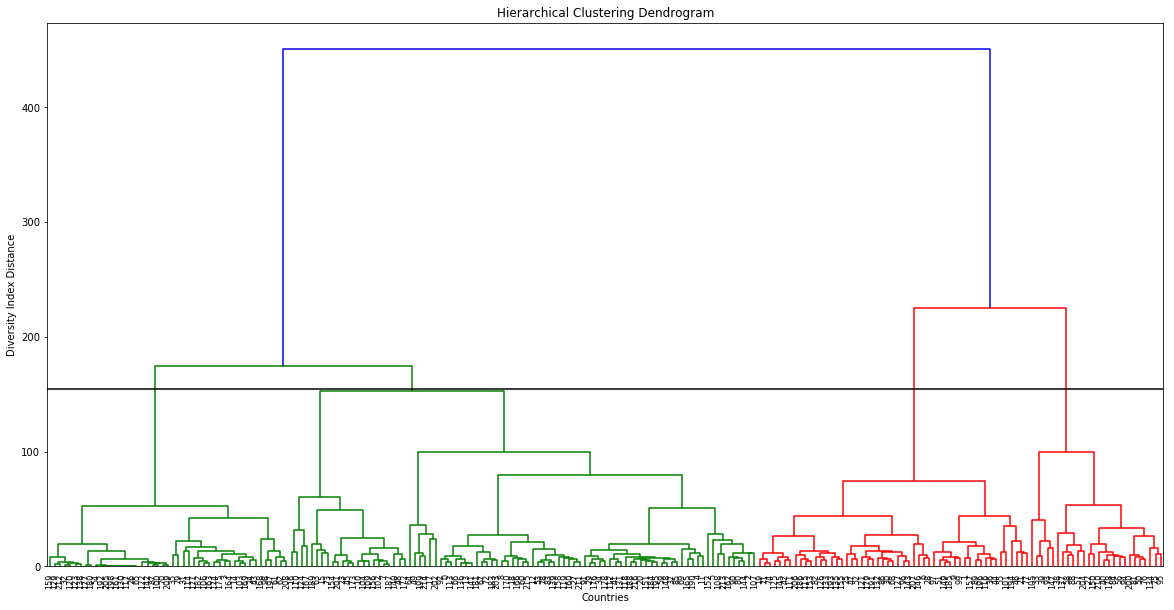

In [40]:
PP.figure(figsize=(20, 10))
PP.title('Hierarchical Clustering Dendrogram')
PP.xlabel('Countries')
PP.ylabel('Diversity Index Distance')
PP.axhline(y = 155, c = 'k')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
PP.show()

In [43]:
# Create cluster groups with cut at 105 (4 groups total)
from scipy.cluster.hierarchy import fcluster
max_d = 155
clusters = fcluster(Z, max_d, criterion = 'distance')
#clusters

In [44]:
# Dataframe with the country names and their respective cluster groupings
country_groups = pd.DataFrame({'Cluster' : clusters}, index = country_div.index)
country_groups.index.name = 'Countries'
#country_groups

In [47]:
# Displaying the countries within their groups
#for i in country_groups['Cluster'].unique():
  #  print(country_groups[country_groups['Cluster'] == i])

In [13]:
import pylab as PP # load the plotting library
import matplotlib as mpl 
#from mpl_toolkits.basemap import Basemap # Library to plot 2D maps in Python
from IPython.display import Image # Library to attach images inside a code cell in Jupyter
import zipfile # library to compress and uncompress files (zip)
import urllib # library to download files
from matplotlib.collections import PatchCollection # for efficiently drawing many polygons
import os.path # to ckeck if a file exists


In [14]:
import shapely
from descartes import PolygonPatch
from shapely.geometry import Polygon
import fiona
from pyproj import Proj

In [26]:
# the function needs the cut level for the hierarchical model and a pandas DataFrame of the country diversity index values
def cluster_map(cut_level, country_diversity_DF):
    import matplotlib.pyplot as plt
    from scipy.cluster.hierarchy import fcluster
    import numpy as np
    from scipy.cluster.hierarchy import dendrogram, linkage
    country_div = country_diversity_DF.dropna()
    Z = linkage(country_div, 'ward')
    clusters = fcluster(Z, cut_level, criterion = 'distance')
# Dataframe with the country names and their respective cluster groupings
    country_groups = pd.DataFrame({'Cluster' : clusters}, index = country_div.index)
    country_groups.index.name = 'Countries'
    c = fiona.collection('./TM_WORLD_BORDERS-0.3.shp')
    # Pull all names from shapefile attribute table
    country_shp = []
    for record in c:
        country_names = record['properties']['NAME']
        country_shp.append(country_names)

    #converting the shapefile names to the be the index of a dataframe with an empty column
    test = pd.DataFrame(index = country_shp, columns = ['Diversity index'])
    # Determining mismatches in the clustered index and shapefile index, then changing the clusters to match
    # the shapefile index.    
    country_groups = country_groups.rename(index = {"Cabo Verde":"Cape Verde", "Côte d'Ivoire": "Cote d'Ivoire", "Bolivia (Plurinational State of)": "Bolivia","Democratic People's Republic of Korea":"Korea, Democratic People's Republic of",
"Libya":"Libyan Arab Jamahiriya", "Myanmar":"Burma", "Republic of Korea":"Korea, Republic of","Réunion":"Reunion", "United States of America":"United States", "Venezuela (Bolivarian Republic of)":"Venezuela"})

    # this compares the values within country_groups and applies them to the shapefile when the indices match
    test.loc[test.index] = country_groups.loc[country_groups.index]


    """ Create shapely geometries out of each country """
    # Initialize dictionaries for storing shapefile information
    country_geometries = {}
    country_class = {}
    test1= pd.DataFrame.to_dict(test)['Diversity index']
    # Open the world border shapefile
    with fiona.collection('./TM_WORLD_BORDERS-0.3.shp') as fin:
        # loop through countries
        for record in fin:    
            # get country name
            country_name = record['properties']['NAME']    
            # store the geoetries in a formate usable matplotlib
            country_geometries[country_name] = shapely.geometry.shape(record['geometry'])    
            #add the diversity classes
            country_class[country_name] = test1[country_name]

#_____
    
    cm = plt.get_cmap('RdBu')
    num_colors = len(country_groups["Cluster"].unique()) - .7
    patches = [] #Empty list to hold country patches
    for country in country_geometries.keys(): #For each country, pull the country geometry and the diversity/cluster value
        shape = country_geometries[country]
        rec = float(country_class[country])
        if isnan(rec):
            color = cm(1/2)
        else:
            color = cm(1.*rec/(num_colors))
        patch = PolygonPatch(country_geometries[country], fc=color, ec='k', zorder=2, lw=1)
        patches.append(patch)
    #___
    fig,ax = PP.subplots(figsize=(20,10))
    # add polygon patches for each country
    PatchCollection(patches, match_original=True)
    # draw the polygon patches
    ax.add_collection(PatchCollection(patches, match_original=True))
    # set plot bounds
    ax.set_xlim([-180,180])
    ax.set_ylim([-90,90])
    # turn off axes
    ax.axis('off')
    # draw
    return(PP.show())


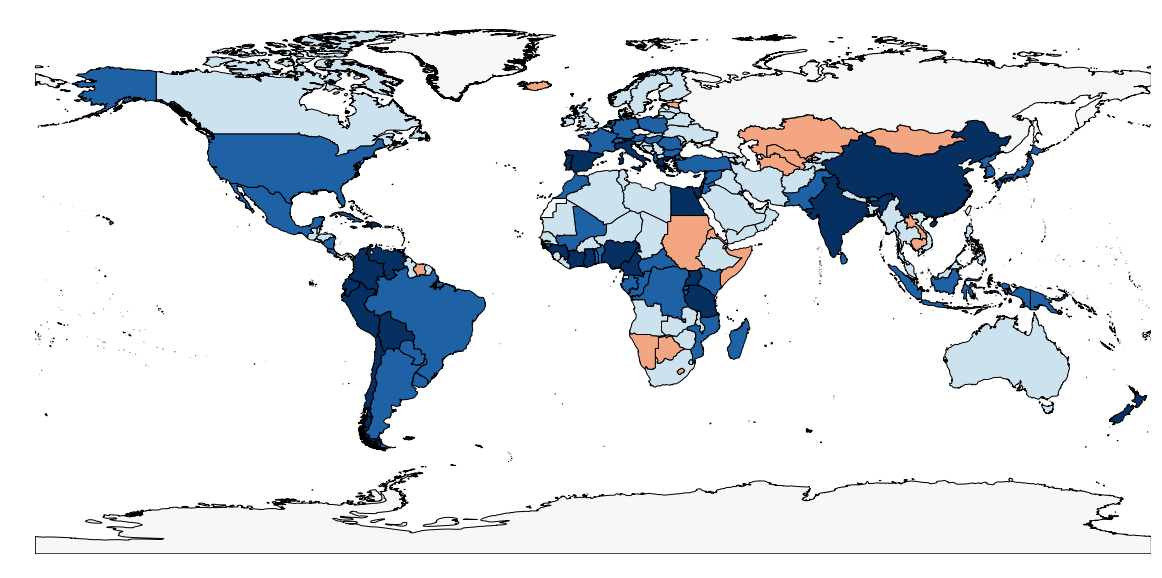

In [48]:
cluster_map(155, country_div)